In [2]:
# import dataset from kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [01:27<00:00, 28.1MB/s]

Extracting model files...


Path to dataset files: /Users/ramonwinkler/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


## The Dataset + EDA



In [3]:
import os

dataset_path= "/Users/ramonwinkler/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2"
for root,dirs, files in os.walk(dataset_path):
  print(root)
  for file in files[:5]:# print first 5 files per folder
    print(" ", file)

/Users/ramonwinkler/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2
/Users/ramonwinkler/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray
/Users/ramonwinkler/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test
/Users/ramonwinkler/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test/PNEUMONIA
  person147_bacteria_706.jpeg
  person100_bacteria_482.jpeg
  person78_bacteria_382.jpeg
  person124_bacteria_589.jpeg
  person1647_virus_2848.jpeg
/Users/ramonwinkler/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test/NORMAL
  IM-0031-0001.jpeg
  IM-0025-0001.jpeg
  NORMAL2-IM-0272-0001.jpeg
  NORMAL2-IM-0102-0001.jpeg
  NORMAL2-IM-0229-0001.jpeg
/Users/ramonwinkler/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/chest_xray
  .DS_Store
/Users/ramonwinkler/.cache/kagglehub/datas

In [1]:
import os # Helps in file handling, such as accessing image directories.
import pandas as pd

# Path to dataset
dataset_path = "/Users/ramonwinkler/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray"

# Dataset categories
categories = ["train", "test", "val"]

data = []

for category in categories:
    category_path = os.path.join(dataset_path, category)

    for label in os.listdir(category_path):  # Should not have a second argument
        label_path = os.path.join(category_path, label)

        if os.path.isdir(label_path):  # Ensure it's a directory
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                data.append((image_path, label, category))  # Store image path, label, and dataset type

# Create DataFrame
df = pd.DataFrame(data, columns=["image_path", "label", "dataset_type"])

df.head()


,image_path,label,dataset_type
0,/Users/ramonwinkler/.cache/kagglehub/datasets/...,PNEUMONIA,train
1,/Users/ramonwinkler/.cache/kagglehub/datasets/...,PNEUMONIA,train
2,/Users/ramonwinkler/.cache/kagglehub/datasets/...,PNEUMONIA,train
3,/Users/ramonwinkler/.cache/kagglehub/datasets/...,PNEUMONIA,train
4,/Users/ramonwinkler/.cache/kagglehub/datasets/...,PNEUMONIA,train


In [3]:
train_df = df[df["dataset_type"]== "train"]
test_df = df[df["dataset_type"]== "test"]
val_df = df[df["dataset_type"]== "val"]

In [6]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5216 entries, 0 to 5215
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_path    5216 non-null   object
 1   label         5216 non-null   object
 2   dataset_type  5216 non-null   object
dtypes: object(3)
memory usage: 163.0+ KB


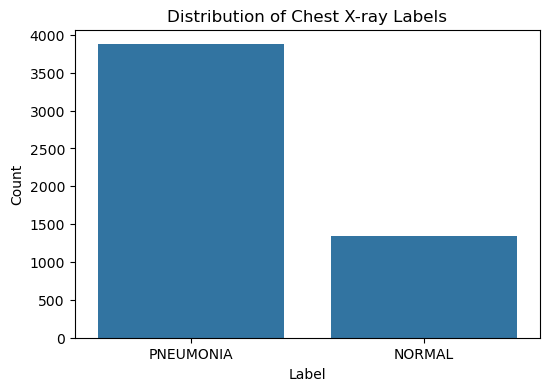

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=train_df["label"]) # label is from object type!!!
plt.title("Distribution of Chest X-ray Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [ ]:
import cv2# opencv: used for image processing and manipulation

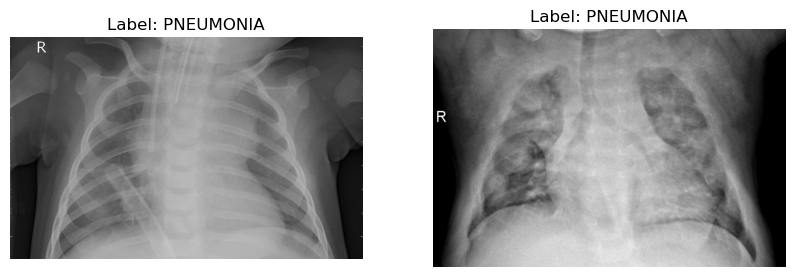

In [9]:
# Pneumonia case
import matplotlib.pyplot as plt

# Select two example images
example_pneumonia = train_df[train_df["label"] == "PNEUMONIA"].sample(2, random_state=42)

# Plot images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for ax, (_, row) in zip(axes, example_pneumonia.iterrows()):
    img = cv2.imread(row["image_path"], cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    ax.imshow(img, cmap="gray")
    ax.set_title(f"Label: {row['label']}")
    ax.axis("off")

plt.show()

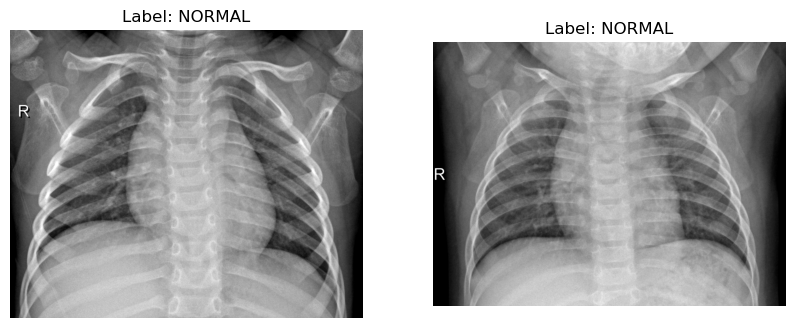

In [10]:
# normal case
# Select two example images
example_pneumonia = train_df[train_df["label"] == "NORMAL"].sample(2, random_state=42)

# Plot images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for ax, (_, row) in zip(axes, example_pneumonia.iterrows()):
    img = cv2.imread(row["image_path"], cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    ax.imshow(img, cmap="gray")
    ax.set_title(f"Label: {row['label']}")
    ax.axis("off")

plt.show()

In [11]:
# Map 'PNEUMONIA' to 1 and 'NORMAL' to 0
train_df["label"] = train_df["label"].map({"PNEUMONIA": 1, "NORMAL": 0})
test_df["label"] = test_df["label"].map({"PNEUMONIA": 1, "NORMAL": 0})
val_df["label"] = val_df["label"].map({"PNEUMONIA": 1, "NORMAL": 0})


/var/folders/9j/mh4k6dbx5sldmm3_0tzdsch00000gn/T/ipykernel_47718/118592955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["label"] = train_df["label"].map({"PNEUMONIA": 1, "NORMAL": 0})
/var/folders/9j/mh4k6dbx5sldmm3_0tzdsch00000gn/T/ipykernel_47718/118592955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["label"] = test_df["label"].map({"PNEUMONIA": 1, "NORMAL": 0})
/var/folders/9j/mh4k6dbx5sldmm3_0tzdsch00000gn/T/ipykernel_47718/118592955.py:4: SettingWithCopyWarning: 
A value 

In [12]:
train_df["label"].value_counts()

label
1    3875
0    1341
Name: count, dtype: int64

In [13]:
# manually prepare data for model training

X_train = train_df.drop("label", axis=1)  # Dropping the label column from the features
y_train = train_df["label"]  # The target variable

X_test = test_df.drop("label", axis=1)  # Dropping the label column from the features
y_test = test_df["label"]  # The target variable

X_val = val_df.drop("label", axis=1)  # Dropping the label column from the features
y_val = val_df["label"]  # The target variable


## Load and Preprocess the Images
In order to train a CNN, the images have to be loaded and preprocessed first.
At this stage the df only contains the labels, the path and the dataset_type

The images have fo be resized and normalized

In [4]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_preprocess_image(img_path, target_size=(64,64)):
    img = image.load_img(img_path, target_size= target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0 # Normalize to [0,1]
    return img_array

def prepare_data(df):
    X = []
    y = []

    for _, row in df.iterrows():
        img_path = row["image_path"]
        label = 1 if row["label"] == "PNEUMONIA" else 0
        X.append(load_and_preprocess_image(img_path))
        y.append(label)

    return np.array(X), np.array(y)

# Load the images for training, validation, and test sets
X_train, y_train = prepare_data(train_df)
X_test, y_test = prepare_data(test_df)
X_val, y_val = prepare_data(val_df)

# Check the shapes of the data arrays
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

X_train shape: (5216, 64, 64, 3), y_train shape: (5216,)
X_test shape: (624, 64, 64, 3), y_test shape: (624,)
X_val shape: (16, 64, 64, 3), y_val shape: (16,)


# Model training

In [15]:
# loading libraries
from tensorflow import keras # deep learning library that runs on top of TensorFlow
from keras.models import Sequential # A model type where layers are stacked sequentialls
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization # dense: A fully connected layer, Conv2D: A convolutional layer for extracting image features,
# maxpool2D: a pooling layer that reduces spatial dimensions, flatten: converts multi-dimensional arrays into a 1D Vecto, Dropout: randomly drops neurons to prevent overfitting,
# BatchNormalization: Normalizes activations to stabilize training
from keras.preprocessing.image import ImageDataGenerator# generates batches of tensor image data with real-time data augmentation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau # reduces the learning rate when the model stops improving

In [6]:
# base model suggested by chatgpt for binary classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))  # Example input shape (64x64 RGB images)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from convolutional layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer= "adam", loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 128)       

In [7]:
print(X_train.shape)
print(y_train.shape)


(5216, 64, 64, 3)
(5216,)


In [8]:
# Train the CNN model
history = model.fit(X_train, y_train, 
                    epochs=10,           # Number of epochs
                    batch_size=32,       # Batch size
                    validation_data=(X_val, y_val), # Validation data
                    verbose=2)           # Display progress


Epoch 1/10


2025-03-03 21:02:08.027681: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


163/163 - 5s - loss: 0.3172 - accuracy: 0.8597 - val_loss: 0.3986 - val_accuracy: 0.8125 - 5s/epoch - 28ms/step
Epoch 2/10
163/163 - 4s - loss: 0.1650 - accuracy: 0.9337 - val_loss: 0.2396 - val_accuracy: 0.9375 - 4s/epoch - 26ms/step
Epoch 3/10
163/163 - 4s - loss: 0.1203 - accuracy: 0.9546 - val_loss: 0.4916 - val_accuracy: 0.7500 - 4s/epoch - 26ms/step
Epoch 4/10
163/163 - 4s - loss: 0.0944 - accuracy: 0.9645 - val_loss: 0.2353 - val_accuracy: 0.8750 - 4s/epoch - 27ms/step
Epoch 5/10
163/163 - 4s - loss: 0.0851 - accuracy: 0.9693 - val_loss: 0.3068 - val_accuracy: 0.8125 - 4s/epoch - 27ms/step
Epoch 6/10
163/163 - 4s - loss: 0.0740 - accuracy: 0.9720 - val_loss: 0.4801 - val_accuracy: 0.8125 - 4s/epoch - 27ms/step
Epoch 7/10
163/163 - 4s - loss: 0.0668 - accuracy: 0.9764 - val_loss: 0.3339 - val_accuracy: 0.8750 - 4s/epoch - 27ms/step
Epoch 8/10
163/163 - 5s - loss: 0.0603 - accuracy: 0.9795 - val_loss: 0.5087 - val_accuracy: 0.8125 - 5s/epoch - 28ms/step
Epoch 9/10
163/163 - 4s - l

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

20/20 - 0s - loss: 1.0635 - accuracy: 0.8013 - 189ms/epoch - 9ms/step
Test Loss: 1.063515067100525, Test Accuracy: 0.8012820482254028


## Performance assessment for unbalanced target

In [10]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Apply threshold 0.5 for binary classification


20/20 [==============================] - 0s 9ms/step


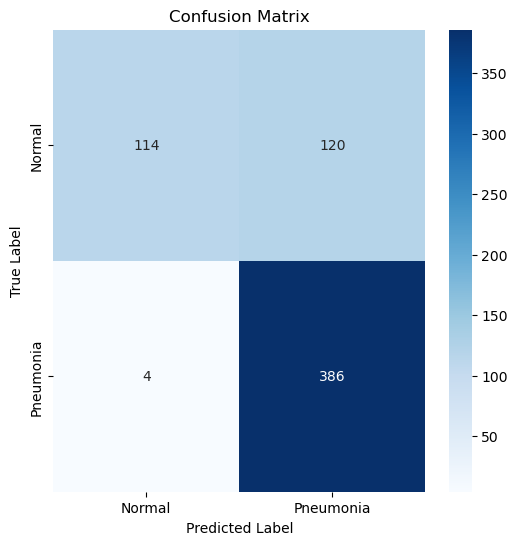

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [13]:
# Print classification report
print(classification_report(y_test, y_pred, target_names=["Normal", "Pneumonia"]))


              precision    recall  f1-score   support

      Normal       0.97      0.49      0.65       234
   Pneumonia       0.76      0.99      0.86       390

    accuracy                           0.80       624
   macro avg       0.86      0.74      0.75       624
weighted avg       0.84      0.80      0.78       624

